In [2]:
import csv
def import_csv(file_name,delimiter=","):
    with open(file_name,"r") as f:
        return list(csv.reader(f,delimiter=delimiter))
original_work_context=import_csv("OriginalONetData/WorkContext.TXT",delimiter="\t")
current_work_context=import_csv("CurrentONetData/Work Context.csv")

In [3]:
original_jobs_list = set(a[0] for a in original_work_context)
new_jobs_list = set(a[0] for a in current_work_context)
shared_jobs_list = original_jobs_list.intersection(new_jobs_list)
v1 = [a for a in original_work_context if a[0] in shared_jobs_list][1:]
v2 = [a for a in current_work_context if a[0] in shared_jobs_list and a[4]=="CX"]

In [4]:
original_contexts=set([v[1] for v in v1])
new_contexts=set([v[2] for v in v2])
shared=original_contexts.intersection(new_contexts)

In [5]:
joint_v1 = [v for v in v1 if v[1] in shared]
joint_v2 = [v for v in v2 if v[2] in shared]
joint_v2

[['11-2011.00',
  'Advertising and Promotions Managers',
  '4.C.1.a.4',
  'Contact With Others',
  'CX',
  'Context',
  '',
  '4.65',
  '19',
  '0.19',
  '4.25',
  '5',
  'N',
  '',
  '06/2010',
  'Incumbent'],
 ['11-2011.00',
  'Advertising and Promotions Managers',
  '4.C.1.b.1.f',
  'Deal With External Customers',
  'CX',
  'Context',
  '',
  '3.89',
  '19',
  '0.35',
  '3.16',
  '4.62',
  'N',
  '',
  '06/2010',
  'Incumbent'],
 ['11-2011.00',
  'Advertising and Promotions Managers',
  '4.C.1.b.1.g',
  'Coordinate or Lead Others',
  'CX',
  'Context',
  '',
  '4.12',
  '19',
  '0.23',
  '3.65',
  '4.6',
  'N',
  '',
  '06/2010',
  'Incumbent'],
 ['11-2011.00',
  'Advertising and Promotions Managers',
  '4.C.1.c.1',
  "Responsible for Others' Health and Safety",
  'CX',
  'Context',
  '',
  '1.83',
  '19',
  '0.28',
  '1.24',
  '2.42',
  'N',
  '',
  '06/2010',
  'Incumbent'],
 ['11-2011.00',
  'Advertising and Promotions Managers',
  '4.C.1.c.2',
  'Responsibility for Outcomes and 

In [6]:
sliced_v1=[[v[0],v[1],v[2],v[4]] for v in joint_v1]
sliced_v2=[[v[0],v[2],v[3],v[7],v[14]] for v in joint_v2]
old_numbers=list(float(v[3]) for v in sliced_v2)
new_numbers=list(float(v[3]) for v in sliced_v1)

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline

In [48]:
o=pd.Series(old_numbers)
n=pd.Series(new_numbers)

In [49]:
p=pd.DataFrame(list(zip(o,n)))
p.corr()

,0,1
0,1.000000,0.710447
1,0.710447,1.000000


In [50]:
from scipy.stats.stats import pearsonr
pearsonr(old_numbers, new_numbers)

(0.7104470356320971, 0.0)

In [51]:
doa_figure1 = [v for v in sliced_v1 if v[1]=="4.C.3.b.2"]
doa_figure2 = [v for v in sliced_v2 if v[1]=="4.C.3.b.2"]
doa_figure2

[['11-2011.00', '4.C.3.b.2', 'Degree of Automation', '2.56', '06/2010'],
 ['11-2021.00', '4.C.3.b.2', 'Degree of Automation', '2.1', '07/2015'],
 ['11-2022.00', '4.C.3.b.2', 'Degree of Automation', '2.27', '07/2016'],
 ['11-3011.00', '4.C.3.b.2', 'Degree of Automation', '2.14', '07/2017'],
 ['11-3021.00', '4.C.3.b.2', 'Degree of Automation', '2.56', '07/2016'],
 ['11-3031.01', '4.C.3.b.2', 'Degree of Automation', '3', '07/2012'],
 ['11-3031.02', '4.C.3.b.2', 'Degree of Automation', '2.57', '07/2014'],
 ['11-3051.00', '4.C.3.b.2', 'Degree of Automation', '2.21', '07/2013'],
 ['11-3061.00', '4.C.3.b.2', 'Degree of Automation', '2.75', '06/2009'],
 ['11-3071.01', '4.C.3.b.2', 'Degree of Automation', '2.05', '07/2014'],
 ['11-3071.02', '4.C.3.b.2', 'Degree of Automation', '2.67', '07/2017'],
 ['11-9021.00', '4.C.3.b.2', 'Degree of Automation', '2.04', '07/2013'],
 ['11-9031.00', '4.C.3.b.2', 'Degree of Automation', '1.68', '06/2010'],
 ['11-9032.00', '4.C.3.b.2', 'Degree of Automation', '2

In [52]:
pearsonr(list(float(v[3]) for v in doa_figure1), list(float(v[3]) for v in doa_figure2))

(0.36884629893904142, 1.050912545116739e-21)

In [53]:
df_prep_1 = [float(v[3]) for v in doa_figure1]
df_prep_2 = [float(v[3]) for v in doa_figure2]

In [54]:
df=pd.DataFrame(list(zip(df_prep_1,df_prep_2)))

In [1]:
plt.scatter(list(float(v[3]) for v in doa_figure1),list(float(v[3]) for v in doa_figure2))

NameError: name 'plt' is not defined

In [56]:
# Fraction of jobs where measured automation increases
sum([v[0]<v[1] for v in list(zip(df_prep_1,df_prep_2))])/len(df_prep_1)

0.5866454689984102

In [57]:
target1=doa_figure1
target2=doa_figure2
from collections import defaultdict
dates_differences_dict=defaultdict(list)
for i in range(len(target1)):
    new=[target1[i],target2[i]]
    dates_differences_dict[target2[i][4]].append(new)

dates_changes={}
for key,val in dates_differences_dict.items():
    greater=0
    for c in val:
        if float(c[0][3])>float(c[1][3]):
            greater+=1
    dates_changes[key]=[greater/float(len(val)),len(val)]
sorted(dates_changes.items(),key=lambda x:(x[0][2:]))

[('03/2002', [0.0, 1]),
 ('12/2004', [0.5, 4]),
 ('07/2005', [1.0, 2]),
 ('12/2005', [0.18181818181818182, 11]),
 ('06/2006', [0.75, 8]),
 ('12/2006', [0.29411764705882354, 17]),
 ('06/2007', [0.6666666666666666, 33]),
 ('06/2008', [0.6470588235294118, 17]),
 ('06/2009', [0.44, 25]),
 ('06/2010', [0.4067796610169492, 59]),
 ('07/2011', [0.3387096774193548, 62]),
 ('07/2012', [0.4, 50]),
 ('07/2013', [0.2923076923076923, 65]),
 ('07/2014', [0.37662337662337664, 77]),
 ('07/2015', [0.43478260869565216, 69]),
 ('07/2016', [0.4, 70]),
 ('07/2017', [0.4576271186440678, 59])]

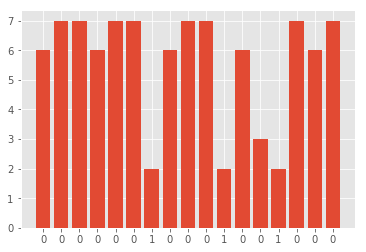

In [58]:
D=dates_changes
plt.bar(range(len(D)), list(v[1] for v in D))
plt.xticks(range(len(D)), list(d[0] for d in D))
plt.show()
# Employment changes

# What have other people controlled for?

# Goal is around a half dozen factors, ideally things that we can find proxies for.

# What predicts automation?

# I still don't trust the changes. 